In [1]:
# Dependencies
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
filepath = 'hate_crime.csv'
df = pd.read_csv(filepath, low_memory=False)
df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [3]:
filtered_df = df[['DATA_YEAR', 'STATE_ABBR', 'OFFENDER_RACE', 'VICTIM_TYPES', 'BIAS_DESC', 
                  'VICTIM_COUNT', 'TOTAL_OFFENDER_COUNT']]
filtered_df.head()

,DATA_YEAR,STATE_ABBR,OFFENDER_RACE,VICTIM_TYPES,BIAS_DESC,VICTIM_COUNT,TOTAL_OFFENDER_COUNT
0,1991,AR,White,Individual,Anti-Black or African American,1,1
1,1991,AR,Black or African American,Individual,Anti-White,1,1
2,1991,AR,Black or African American,Individual,Anti-Black or African American,1,1
3,1991,AR,Black or African American,Individual,Anti-White,2,1
4,1991,AR,Black or African American,Individual,Anti-White,1,1


In [4]:
years_df = filtered_df[(filtered_df['DATA_YEAR'] >= 2014) & (df['DATA_YEAR'] <= 2018)]
years_df

,DATA_YEAR,STATE_ABBR,OFFENDER_RACE,VICTIM_TYPES,BIAS_DESC,VICTIM_COUNT,TOTAL_OFFENDER_COUNT
169146,2014,AK,Unknown,Individual,Anti-Gay (Male),2,0
169147,2014,AK,White,Individual,Anti-American Indian or Alaska Native,1,2
169148,2014,AK,White,Individual,Anti-Black or African American,1,1
169149,2014,AK,Black or African American,Individual,Anti-American Indian or Alaska Native,2,2
169150,2014,AK,White,Individual,Anti-American Indian or Alaska Native,1,2
...,...,...,...,...,...,...,...
201398,2018,WV,Unknown,Individual,Anti-Black or African American,1,0
201399,2018,WV,White,Individual,Anti-Black or African American,1,1
201400,2018,WV,Unknown,Individual,Anti-Asian,1,0
201401,2018,WV,White,Law Enforcement Officer,Anti-White,1,1


In [5]:
bias = years_df['BIAS_DESC'].value_counts()
bias = pd.DataFrame(bias).sort_index().rename(columns={'BIAS_DESC':'Total'})

bias14 = years_df.loc[years_df['DATA_YEAR'] == 2014,:]['BIAS_DESC'].value_counts()
bias14_df = pd.DataFrame(bias14).sort_index().rename(columns={'BIAS_DESC':'2014'})

bias15 = years_df.loc[years_df['DATA_YEAR'] == 2015,:]['BIAS_DESC'].value_counts()
bias15_df = pd.DataFrame(bias15).sort_index().rename(columns={'BIAS_DESC':'2015'})

bias16 = years_df.loc[years_df['DATA_YEAR'] == 2016,:]['BIAS_DESC'].value_counts()
bias16_df = pd.DataFrame(bias16).sort_index().rename(columns={'BIAS_DESC':'2016'})

bias17 = years_df.loc[years_df['DATA_YEAR'] == 2017,:]['BIAS_DESC'].value_counts()
bias17_df = pd.DataFrame(bias17).sort_index().rename(columns={'BIAS_DESC':'2017'})

bias18 = years_df.loc[years_df['DATA_YEAR'] == 2018,:]['BIAS_DESC'].value_counts()
bias18_df = pd.DataFrame(bias18).sort_index().rename(columns={'BIAS_DESC':'2018'})

bias_updtd = pd.concat([bias, bias14_df, bias15_df, bias16_df, bias17_df, bias18_df], axis=1)
bias_updtd_df = bias_updtd.dropna().reset_index().rename(columns={'index':'Bias'})
bias_plot = bias_updtd_df.loc[bias_updtd_df['Total']>=1000, :].sort_values(by=['Total'], 
                                ascending=False).reset_index(drop=True)
bias_plot

,Bias,Total,2014,2015,2016,2017,2018
0,Anti-Black or African American,9176,1647.0,1759.0,1770.0,2059.0,1941.0
1,Anti-Jewish,3779,613.0,668.0,689.0,957.0,852.0
2,Anti-White,3473,610.0,615.0,738.0,709.0,801.0
3,Anti-Gay (Male),3394,612.0,677.0,689.0,676.0,740.0
4,Anti-Hispanic or Latino,1879,306.0,301.0,347.0,433.0,492.0
5,Anti-Other Race/Ethnicity/Ancestry,1374,346.0,257.0,226.0,277.0,268.0
6,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",1281,246.0,205.0,244.0,284.0,302.0
7,Anti-Islamic (Muslim),1194,156.0,260.0,309.0,278.0,191.0


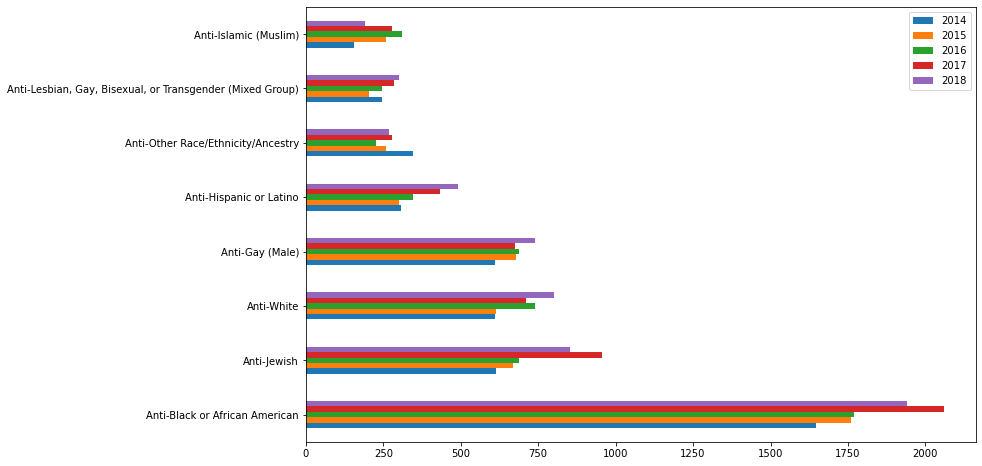

In [6]:
multi_plot = bias_plot[['2014', '2015', '2016', '2017', '2018']].plot(kind = 'barh', figsize = (12,8))
multi_plot.set_yticklabels(bias_plot['Bias'], rotation = 0)
plt.show()

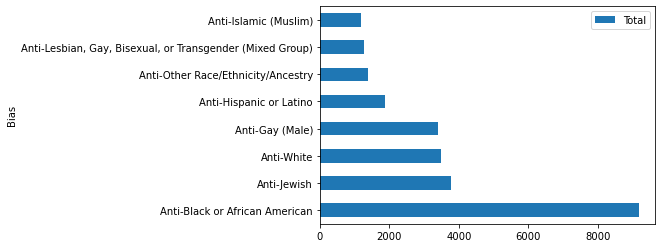

In [7]:
# Generate a bar plot
total = bias_plot.plot.barh(x='Bias', y='Total')
plt.savefig('Charts/totalchart.png')

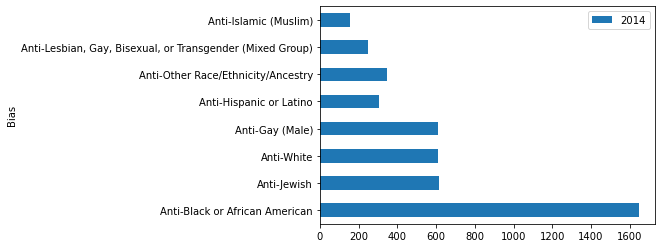

In [8]:
# Generate a bar plot
chart14 = bias_plot.plot.barh(x='Bias', y='2014')
plt.savefig('Charts/2014chart.png')

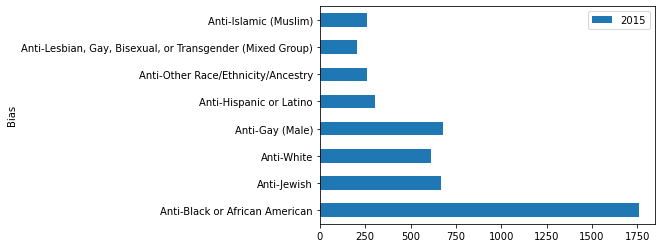

In [9]:
# Generate a bar plot
chart15 = bias_plot.plot.barh(x='Bias', y='2015')
plt.savefig('Charts/2015chart.png')

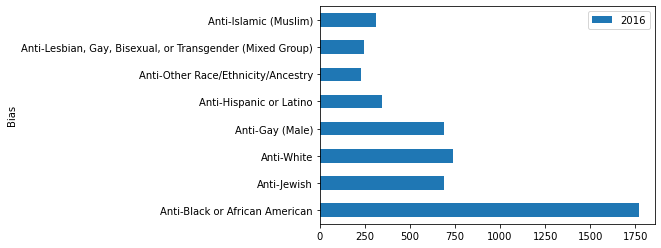

In [10]:
# Generate a bar plot
chart16 = bias_plot.plot.barh(x='Bias', y='2016')
plt.savefig('Charts/2016chart.png')

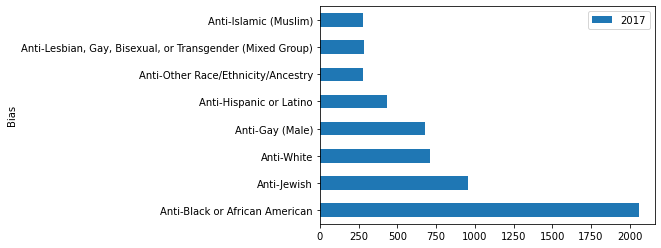

In [11]:
# Generate a bar plot
chart17 = bias_plot.plot.barh(x='Bias', y='2017')
plt.savefig('Charts/2017chart.png')

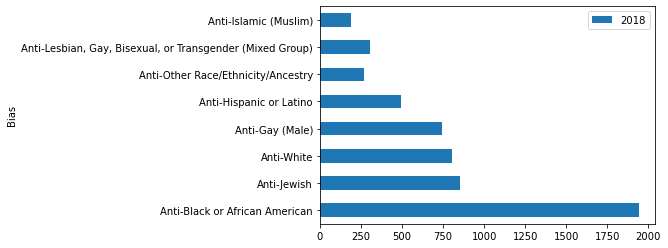

In [12]:
# Generate a bar plot
chart18 = bias_plot.plot.barh(x='Bias', y='2018')
plt.savefig('Charts/2018chart.png')

In [13]:
per_change1 = (((bias_plot['2015']) - (bias_plot['2014'])) / (bias_plot['2014'])).round(3)
per_change2 = (((bias_plot['2016']) - (bias_plot['2015'])) / (bias_plot['2015'])).round(3)
per_change3 = (((bias_plot['2017']) - (bias_plot['2016'])) / (bias_plot['2016'])).round(3)
per_change4 = (((bias_plot['2018']) - (bias_plot['2017'])) / (bias_plot['2017'])).round(3)

change_df = {
    "% chg 14 to 15":per_change1,
    "% chg 15 to 16":per_change2,
    "% chg 16 to 17":per_change3,
    "% chg 17 to 18":per_change4
}
change_df = pd.DataFrame(change_df, columns=change_df.keys())
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color
change_chart = change_df.set_index((bias_plot['Bias'])).style.format('{:.2%}').applymap(color_negative_red)
change_chart

,% chg 14 to 15,% chg 15 to 16,% chg 16 to 17,% chg 17 to 18
Bias,,,,
Anti-Black or African American,6.80%,0.60%,16.30%,-5.70%
Anti-Jewish,9.00%,3.10%,38.90%,-11.00%
Anti-White,0.80%,20.00%,-3.90%,13.00%
Anti-Gay (Male),10.60%,1.80%,-1.90%,9.50%
Anti-Hispanic or Latino,-1.60%,15.30%,24.80%,13.60%
Anti-Other Race/Ethnicity/Ancestry,-25.70%,-12.10%,22.60%,-3.20%
"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",-16.70%,19.00%,16.40%,6.30%
Anti-Islamic (Muslim),66.70%,18.80%,-10.00%,-31.30%
